#📌 Extracción

In [27]:
import pandas as pd

nombre_archivo = 'TelecomX_Data.json'
df = pd.read_json(nombre_archivo)

customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

Charges_df = account_df['Charges'].apply(pd.Series)

account_df_final = pd.concat([account_df.drop(columns=['Charges']), Charges_df], axis=1)

df_normalizado = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                            customer_df,
                            phone_df,
                            internet_df,
                            account_df_final], axis=1)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

In [28]:
import pandas as pd

print("--- REPORTE DE CALIDAD DE DATOS ---")
print("\n1. Valores faltantes por columna:")
print(df_normalizado.isnull().sum())

print("\n2. Filas duplicadas:")
filas_duplicadas = df_normalizado.duplicated().sum()
print(f"Número de filas duplicadas: {filas_duplicadas}")


--- REPORTE DE CALIDAD DE DATOS ---

1. Valores faltantes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

2. Filas duplicadas:
Número de filas duplicadas: 0


In [29]:
print("\n3. Consistencia en columnas categóricas:")

columnas_categoricas = df_normalizado.select_dtypes(include='object').columns

for col in columnas_categoricas:
    print(f"\n--- Valores únicos en '{col}' ---")
    print(df_normalizado[col].value_counts(dropna=False))


3. Consistencia en columnas categóricas:

--- Valores únicos en 'customerID' ---
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--- Valores únicos en 'Churn' ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- Valores únicos en 'gender' ---
gender
Male      3675
Female    3592
Name: count, dtype: int64

--- Valores únicos en 'Partner' ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64

--- Valores únicos en 'Dependents' ---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

--- Valores únicos en 'PhoneService' ---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

--- Valores únicos en 'MultipleLines' ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

--- Valores únicos en 'Intern

In [30]:
import pandas as pd
import numpy as np

# Reemplaza los valores vacíos por NaN para que sean tratados como valores faltantes.
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

# a) Reemplaza los valores vacíos por NaN
df_normalizado['Total'] = df_normalizado['Total'].replace(' ', np.nan)
# b) Convierte la columna a tipo numérico (float)
df_normalizado['Total'] = pd.to_numeric(df_normalizado['Total'])


print("--- REPORTE DE CALIDAD DESPUÉS DE LA LIMPIEZA ---")
print("\nValores únicos en 'Churn' después de la limpieza:")
print(df_normalizado['Churn'].value_counts(dropna=False))

print("\nInformación del DataFrame después de la limpieza:")
df_normalizado.info()

print("\nResumen numérico:")
print(df_normalizado.describe())

--- REPORTE DE CALIDAD DESPUÉS DE LA LIMPIEZA ---

Valores únicos en 'Churn' después de la limpieza:
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProt

In [31]:
#Crea la nueva columna 'Cuentas_Diarias'
df_normalizado['Cuentas_Diarias'] = df_normalizado['Monthly'] / 30

df_new = df_normalizado.copy()

print("DataFrame con la nueva columna")
df_new

DataFrame con la nueva columna


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [36]:
import pandas as pd
import numpy as np

df_estandarizado = df_new.copy()

# Rellenar los valores NaN en 'Total' con 0.0
df_estandarizado['Total'] = df_estandarizado['Total'].fillna(0.0)

#Borrar los valores NaN de Churn
df_estandarizado.dropna(subset=['Churn'], inplace=True)

# Estandarizar valores y convertir a binario

#Unificar los valores de servicio
columnas_a_unificar = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in columnas_a_unificar:
    df_estandarizado[col] = df_estandarizado[col].replace(['No phone service', 'No internet service'], 'No')

# Convertir 'Yes'/'No' y las columnas relevantes a binario (1 y 0)
columnas_a_binario = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
] + columnas_a_unificar

for col in columnas_a_binario:
    df_estandarizado[col] = df_estandarizado[col].replace('Yes', 1)
    df_estandarizado[col] = df_estandarizado[col].replace('No', 0)


# Verificación final de los tipos de datos y los cambios ---
print("Verificación de los tipos de datos después de la estandarización:")
df_estandarizado.info()

print("\nDataFrame estandarizado:")
df_estandarizado

Verificación de los tipos de datos después de la estandarización:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-n

/tmp/ipython-input-863073050.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_estandarizado[col] = df_estandarizado[col].replace('No', 0)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [45]:
# Realizar el análisis descriptivo de las columnas numéricas clave
print("Análisis descriptivo de los datos numéricos:")
print(df_estandarizado[['tenure', 'Monthly', 'Total','Cuentas_Diarias']].describe())

# Analizar la distribución de columnas categóricas
print("\nDistribución de las columnas 'gender' y 'Contract':")
print(df_estandarizado['gender'].value_counts())
print("\n")
print(df_estandarizado['Contract'].value_counts())

Análisis descriptivo de los datos numéricos:
            tenure      Monthly        Total  Cuentas_Diarias
count  7043.000000  7043.000000  7043.000000      7043.000000
mean     32.371149    64.761692  2279.734304         2.158723
std      24.559481    30.090047  2266.794470         1.003002
min       0.000000    18.250000     0.000000         0.608333
25%       9.000000    35.500000   398.550000         1.183333
50%      29.000000    70.350000  1394.550000         2.345000
75%      55.000000    89.850000  3786.600000         2.995000
max      72.000000   118.750000  8684.800000         3.958333

Distribución de las columnas 'gender' y 'Contract':
gender
Male      3555
Female    3488
Name: count, dtype: int64


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


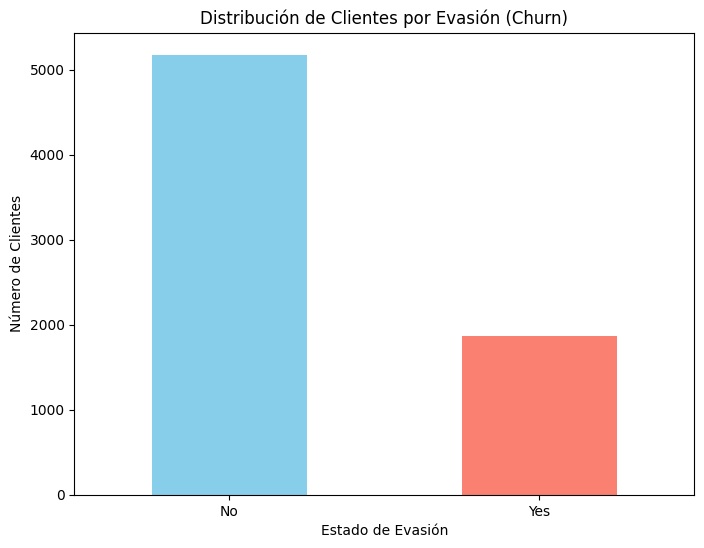

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de clientes en cada categoría de 'Churn'
distribucion_churn = df_estandarizado['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
distribucion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Estado de Evasión')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


In [43]:
import pandas as pd

# Analizar Churn vs. Género
print("Análisis de Churn por Género:")
print(pd.crosstab(df_estandarizado['gender'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. Tipo de Contrato
print("Análisis de Churn por Tipo de Contrato:")
print(pd.crosstab(df_estandarizado['Contract'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. Método de Pago
print("Análisis de Churn por Método de Pago:")
print(pd.crosstab(df_estandarizado['PaymentMethod'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. InternetService
print("Análisis de Churn por Servicio de Internet:")
print(pd.crosstab(df_estandarizado['InternetService'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. SeniorCitizen
print("Análisis de Churn por clientes mayores:")
print(pd.crosstab(df_estandarizado['SeniorCitizen'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. Partner
print("Análisis de Churn por clientes con Partner:")
print(pd.crosstab(df_estandarizado['Partner'], df_estandarizado['Churn'], normalize='index') * 100)

print("\n------------------------------------------------------\n")

# Analizar Churn vs. Dependents
print("Análisis de Churn por clientes con Dependents:")
print(pd.crosstab(df_estandarizado['Dependents'], df_estandarizado['Churn'], normalize='index') * 100)


Análisis de Churn por Género:
Churn           0          1
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

------------------------------------------------------

Análisis de Churn por Tipo de Contrato:
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

------------------------------------------------------

Análisis de Churn por Método de Pago:
Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700

------------------------------------------------------

Análisis de Churn por Servicio de Internet:
Churn                    0          1
InternetService                      
DSL         

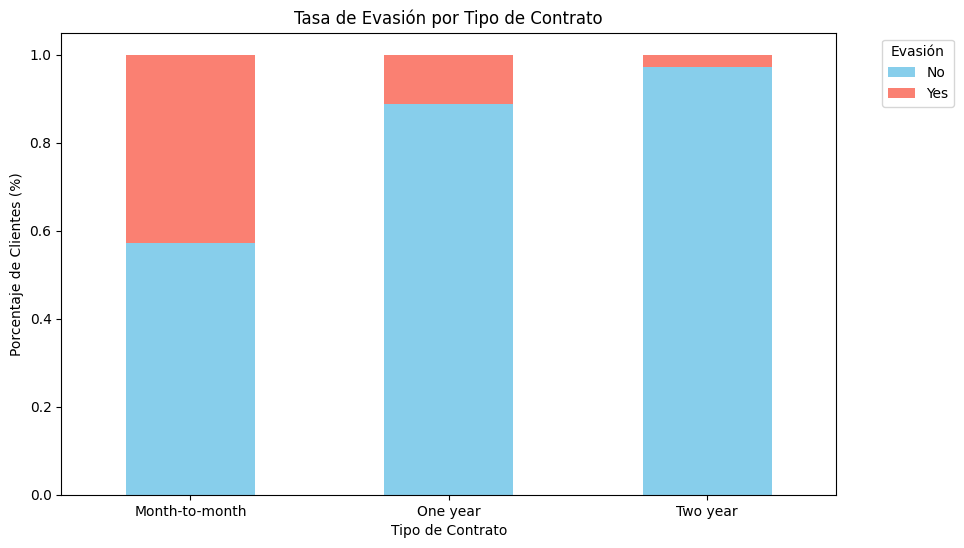

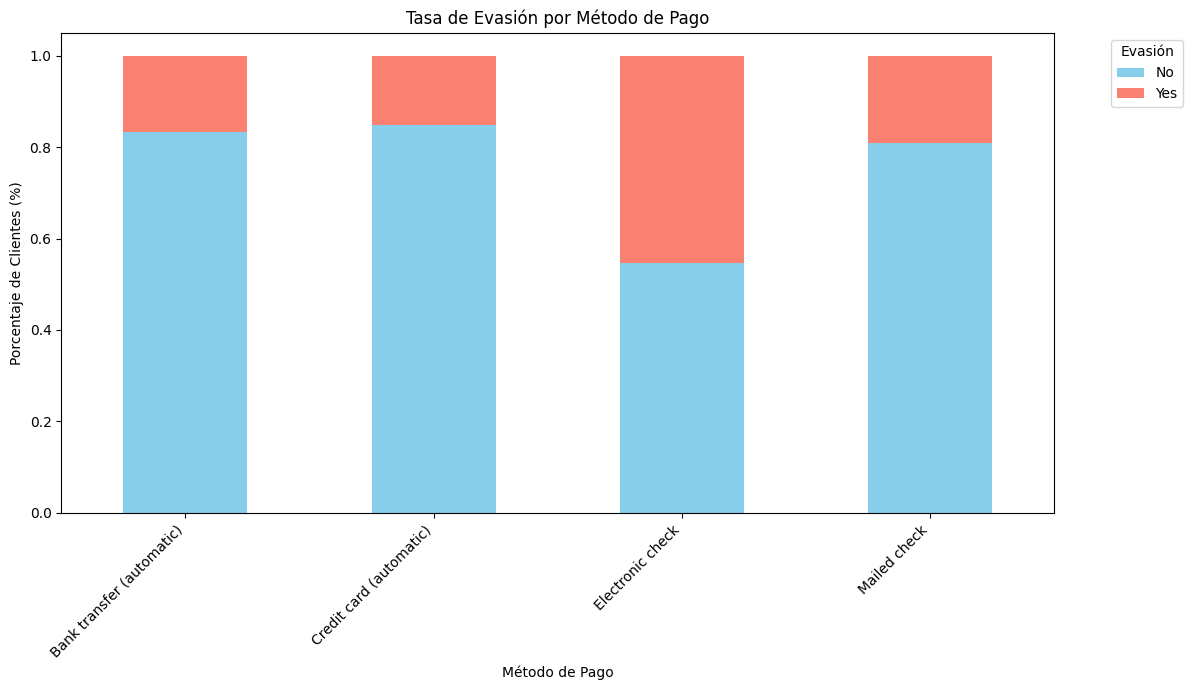

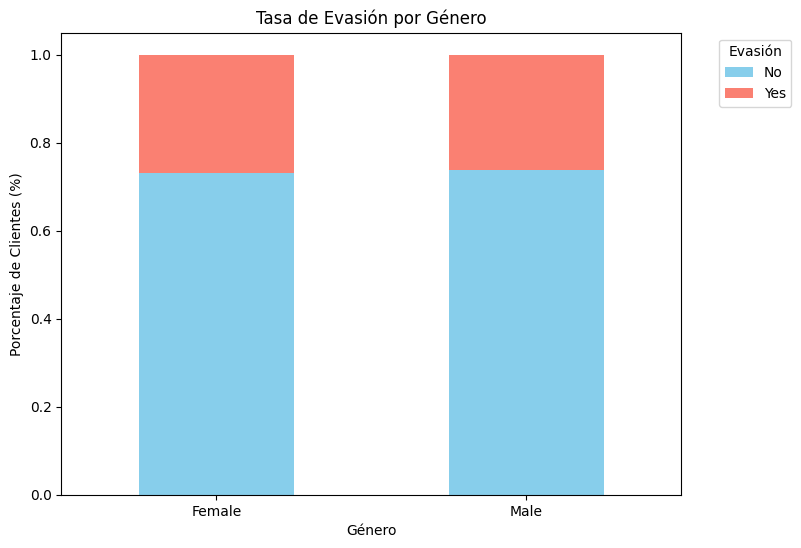

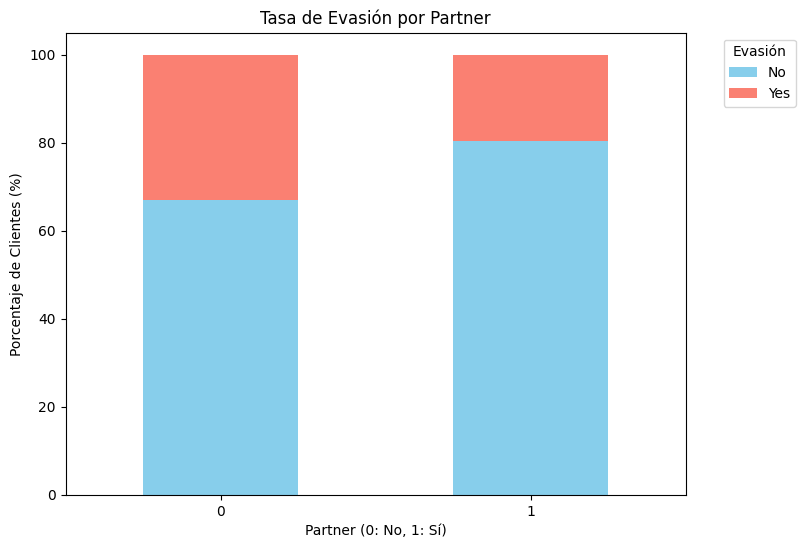

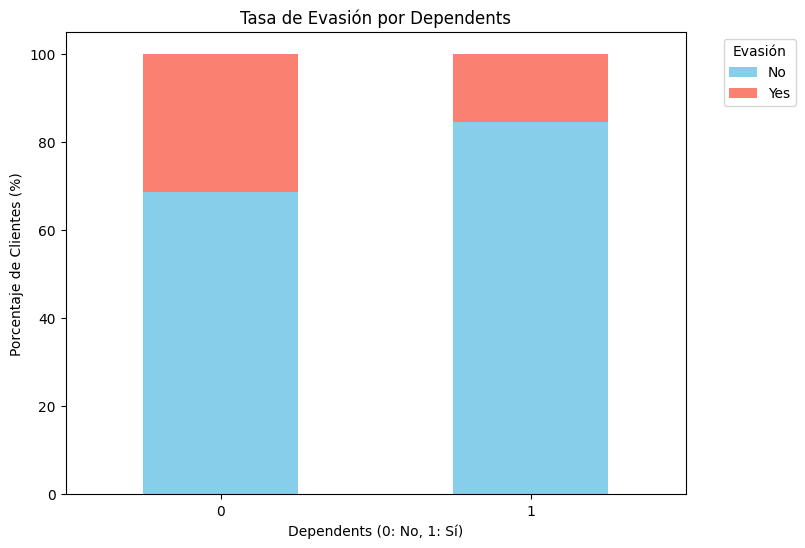

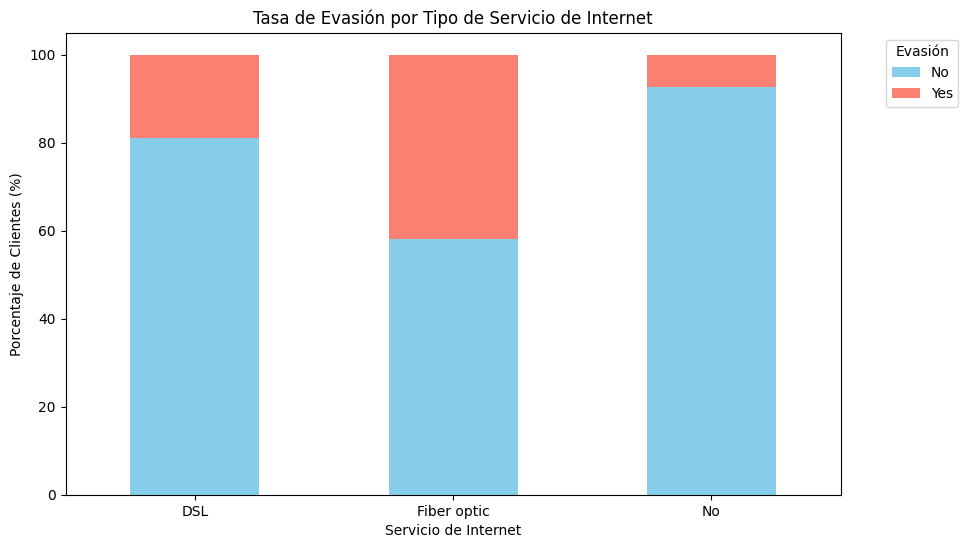

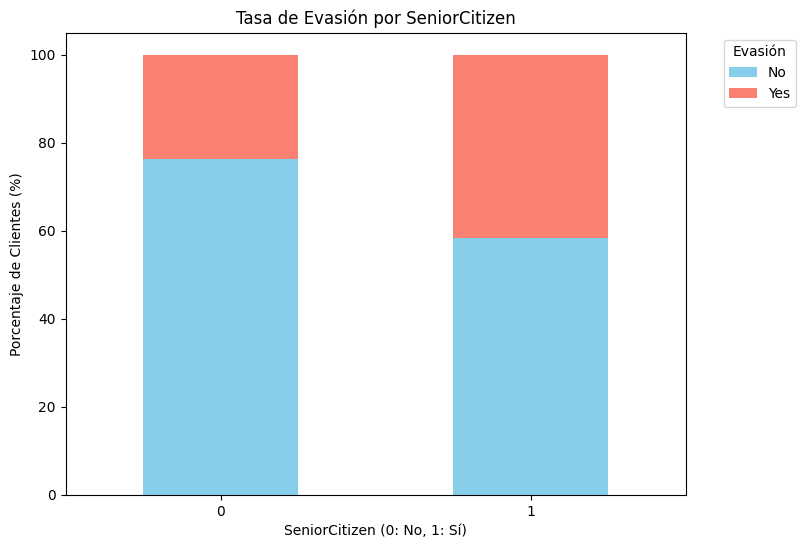

In [51]:
import matplotlib.pyplot as plt
df_analisis=df_estandarizado.copy()

# --- Gráfico de Churn vs. Contrato ---
contract_churn = pd.crosstab(df_analisis['Contract'], df_analisis['Churn'], normalize='index')
contract_churn.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Gráfico de Churn vs. Método de Pago ---
payment_churn = pd.crosstab(df_analisis['PaymentMethod'], df_analisis['Churn'], normalize='index')
payment_churn.plot(kind='bar', figsize=(12, 7), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Gráfico de Churn vs. Género ---
gender_churn = pd.crosstab(df_analisis['gender'], df_analisis['Churn'], normalize='index')
gender_churn.plot(kind='bar', figsize=(8, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# --- Gráfico de Churn vs. Partner ---
partner_churn = pd.crosstab(df_estandarizado['Partner'], df_estandarizado['Churn'], normalize='index') * 100
partner_churn.plot(kind='bar', figsize=(8, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Partner')
plt.xlabel('Partner (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Gráfico de Churn vs. Dependents ---
dependents_churn = pd.crosstab(df_estandarizado['Dependents'], df_estandarizado['Churn'], normalize='index') * 100
dependents_churn.plot(kind='bar', figsize=(8, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Dependents')
plt.xlabel('Dependents (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Gráfico de Churn vs. InternetService ---
internet_churn = pd.crosstab(df_estandarizado['InternetService'], df_estandarizado['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Gráfico de Churn vs. SeniorCitizen ---
senior_churn = pd.crosstab(df_estandarizado['SeniorCitizen'], df_estandarizado['Churn'], normalize='index') * 100
senior_churn.plot(kind='bar', figsize=(8, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Tasa de Evasión por SeniorCitizen')
plt.xlabel('SeniorCitizen (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


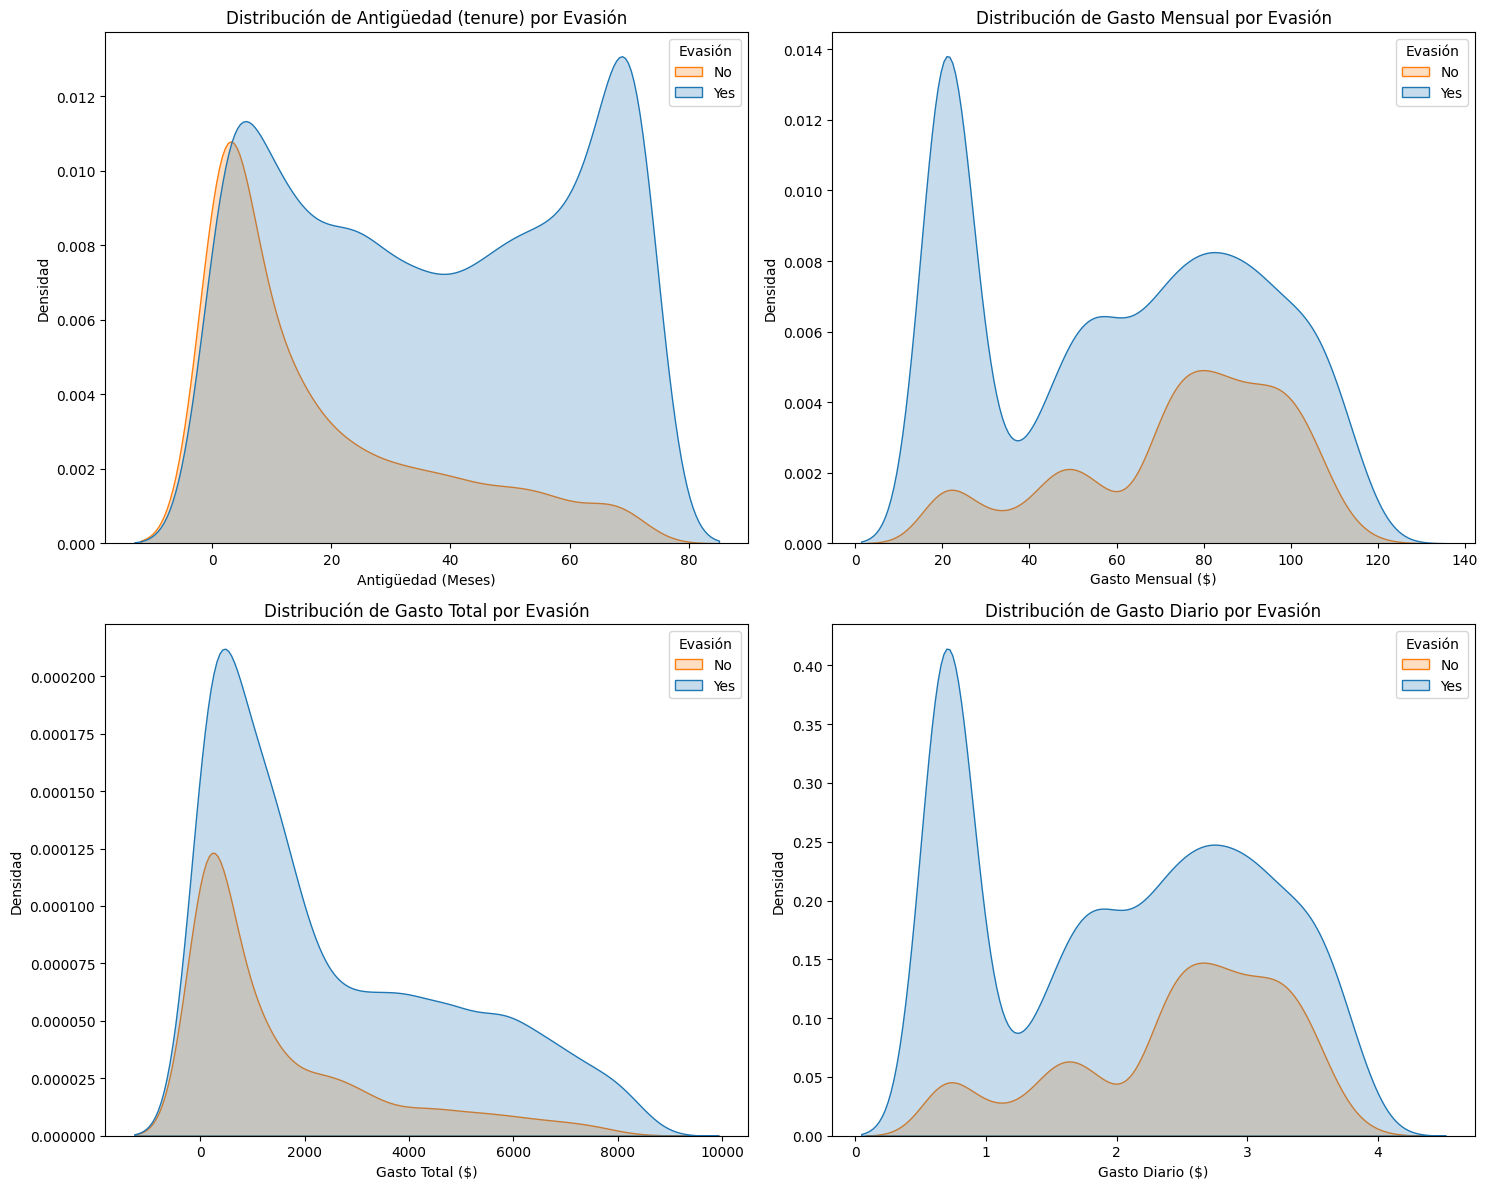

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico para 'tenure'
sns.kdeplot(data=df_estandarizado, x='tenure', hue='Churn', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Antigüedad (tenure) por Evasión')
axes[0, 0].set_xlabel('Antigüedad (Meses)')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].legend(title='Evasión', labels=['No', 'Yes'])

# Gráfico para 'Monthly'
sns.kdeplot(data=df_estandarizado, x='Monthly', hue='Churn', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Gasto Mensual por Evasión')
axes[0, 1].set_xlabel('Gasto Mensual ($)')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend(title='Evasión', labels=['No', 'Yes'])

# Gráfico para 'Total'
sns.kdeplot(data=df_estandarizado, x='Total', hue='Churn', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Gasto Total por Evasión')
axes[1, 0].set_xlabel('Gasto Total ($)')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].legend(title='Evasión', labels=['No', 'Yes'])

# Gráfico para 'Cuentas_Diarias'
sns.kdeplot(data=df_estandarizado, x='Cuentas_Diarias', hue='Churn', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Gasto Diario por Evasión')
axes[1, 1].set_xlabel('Gasto Diario ($)')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].legend(title='Evasión', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

#📄Informe final

Este informe presenta un análisis exhaustivo de la evasión de clientes (Churn) para la empresa TelecomX. El objetivo principal es identificar los factores que influyen en la decisión de los clientes de cancelar sus servicios y, con base en estos hallazgos, proponer recomendaciones estratégicas para mitigar el problema.

El fenómeno de la evasión representa una pérdida significativa de ingresos. Comprender por qué los clientes se van es el primer paso para desarrollar estrategias de retención efectivas y mejorar la satisfacción general.



Antes de iniciar el análisis, se realizó un proceso de limpieza y preprocesamiento de los datos para asegurar su calidad y consistencia. Las principales tareas realizadas fueron:

Importación y Extracción de Datos: Los datos se importaron desde un archivo JSON y se estructuraron en un DataFrame de pandas.

Tratamiento de Valores Faltantes: Se identificaron y rellenaron los valores nulos en las columnas clave. Los valores faltantes en Total se reemplazaron por 0, y en Churn se eliminaron para un análisis posterior más limpio.

Conversión de Tipos de Datos: La columna Total se convirtió a tipo numérico (float). Las variables categóricas se unificaron y se convirtieron a formato binario (1 y 0) para su posterior uso en modelos predictivos.

Se realizaron análisis estadísticos y visualizaciones para identificar patrones y la relación entre las variables

El primer paso fue analizar la proporción de clientes que han cancelado el servicio. El gráfico de barras muestra claramente la distribución de la variable Churn

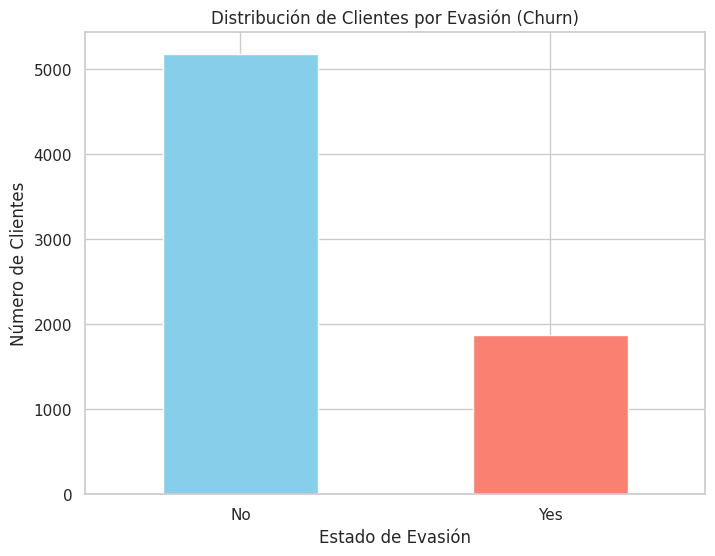

In [61]:
import matplotlib.pyplot as plt

# Contar la cantidad de clientes en cada categoría de 'Churn'
distribucion_churn = df_estandarizado['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
distribucion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Estado de Evasión')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


Se analizó la tasa de evasión en función de variables como el tipo de contrato, el método de pago y el servicio de internet, entre otras.

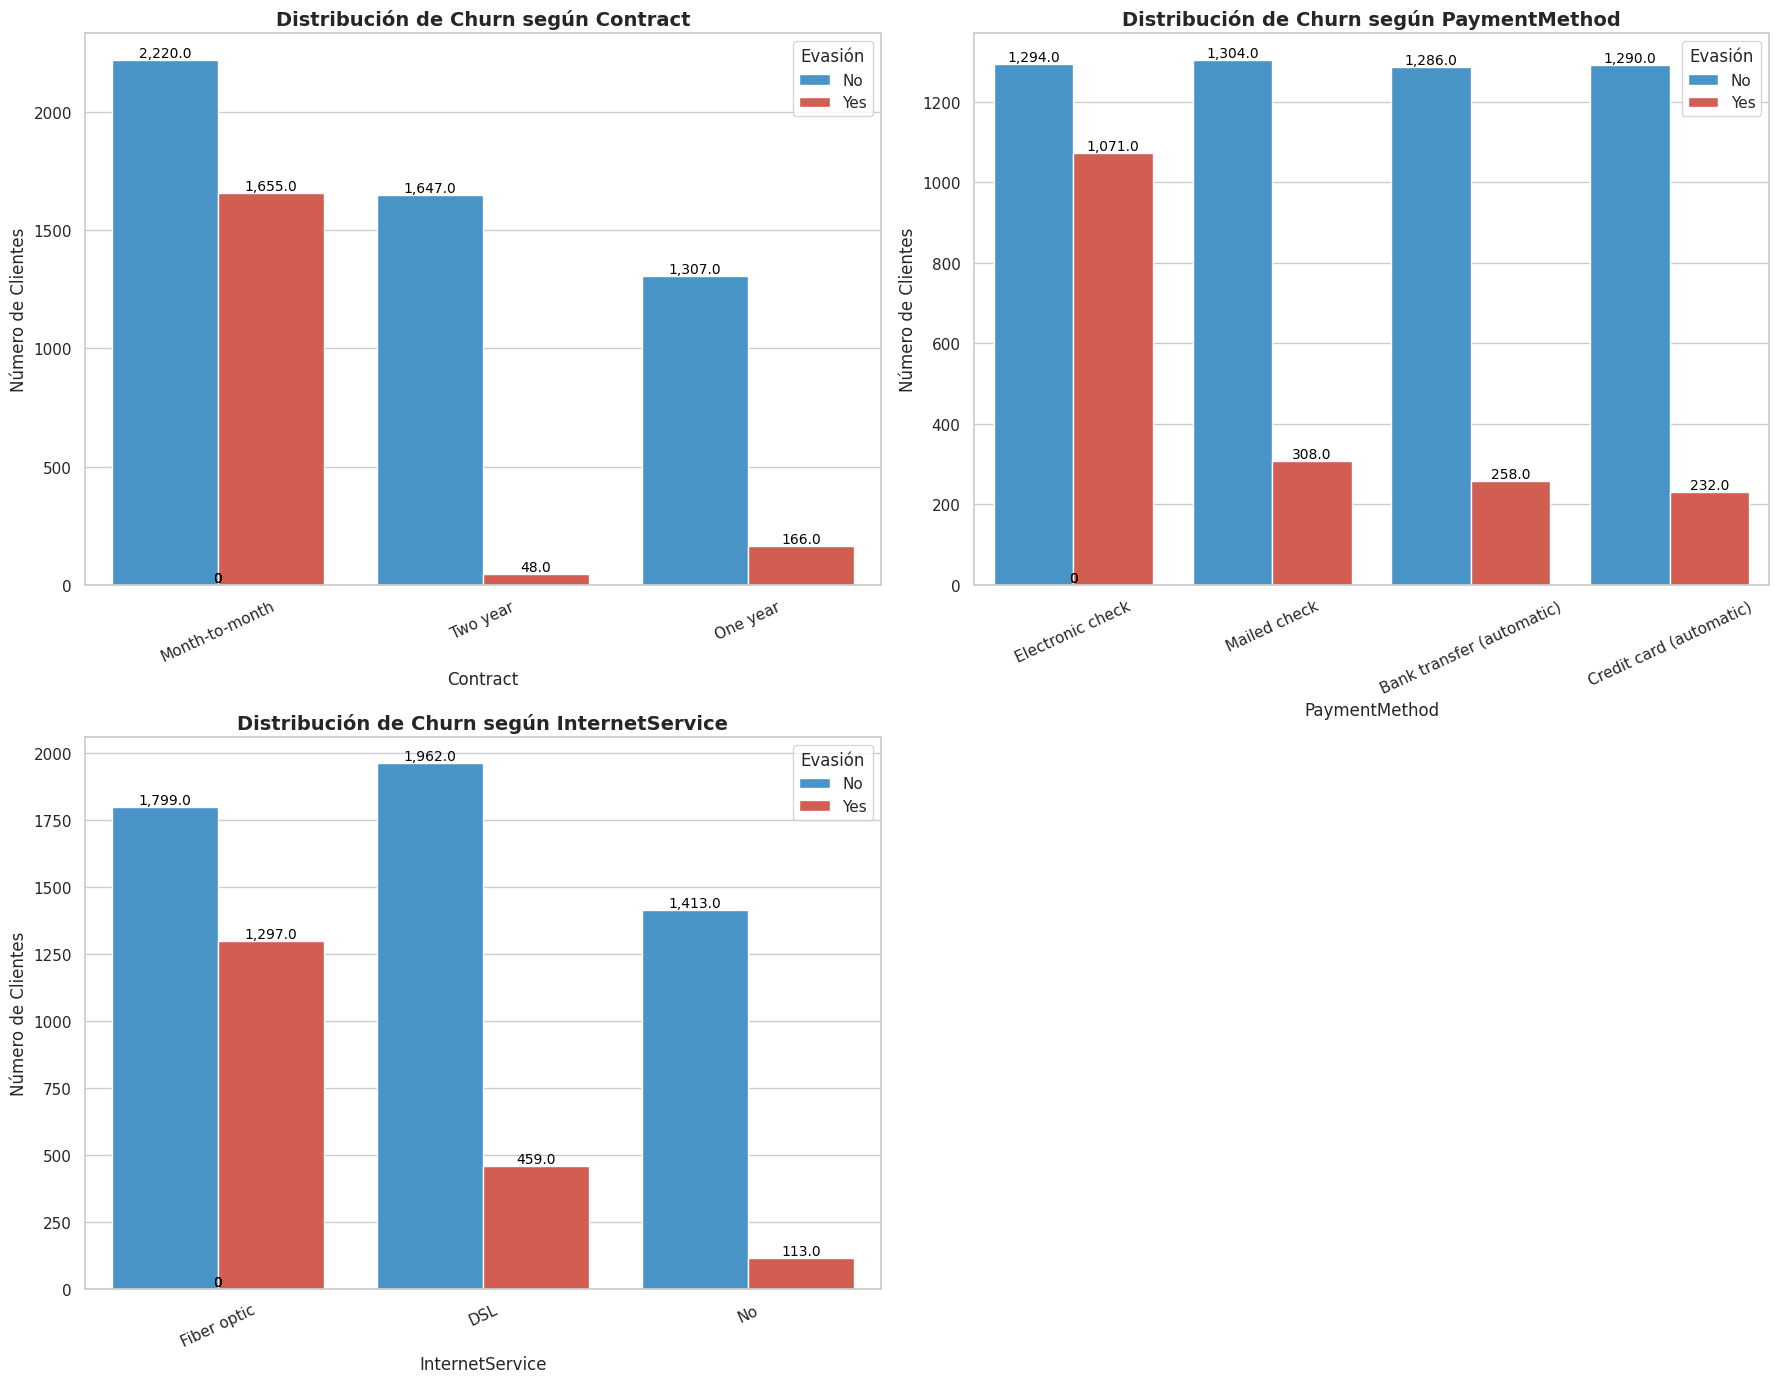

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

columnas_categoricas = ['Contract', 'PaymentMethod', 'InternetService']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

palette = {0: "#3498db", 1: "#e74c3c"} # Updated palette to use integer keys

for i, col in enumerate(columnas_categoricas):
    ax = axes[i]
    plot = sns.countplot(
        data=df_estandarizado,
        x=col,
        hue='Churn',
        ax=ax,
        palette=palette,
        order=df_estandarizado[col].value_counts().index  # ordena de mayor a menor
    )

    ax.set_title(f"Distribución de Churn según {col}", fontsize=14, weight="bold")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Número de Clientes", fontsize=12)
    ax.tick_params(axis='x', rotation=25)

    ax.legend(title="Evasión", labels=["No", "Yes"], loc="upper right")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f"{height:,}",  # formato con comas
            (p.get_x() + p.get_width() / 2., height),
            ha="center", va="bottom",
            fontsize=10, color="black", rotation=0
        )

fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

Los gráficos revelan que los clientes con contratos de mes a mes tienen una tasa de evasión significativamente más alta. De manera similar, los clientes que utilizan el pago electrónico y aquellos con fibra óptica tienden a evadir más.

Del mismo modo, se exploró la distribución de variables numéricas como la antigüedad (tenure), el gasto mensual y el gasto total, para identificar patrones.

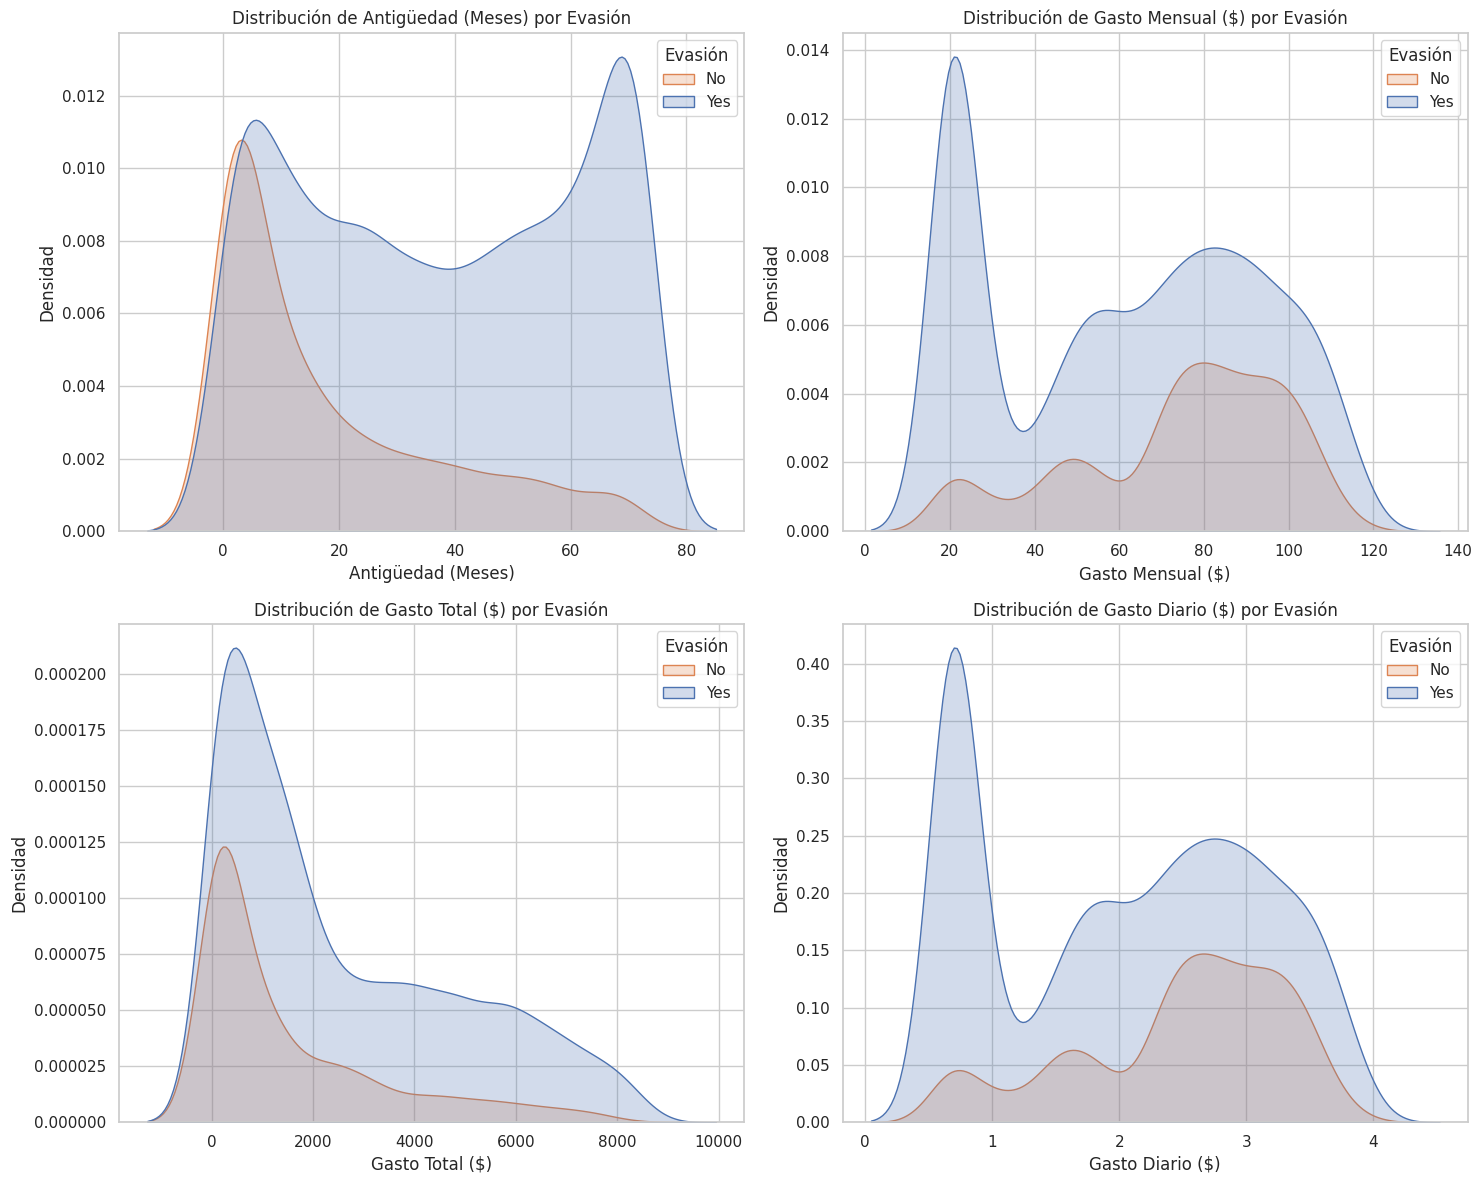

In [63]:
# Convertir Churn a binario para este análisis
df_estandarizado['Churn'] = df_estandarizado['Churn'].replace({'Yes': 1, 'No': 0})
df_estandarizado['Churn'] = df_estandarizado['Churn'].fillna(0)
df_estandarizado['Cuentas_Diarias'] = df_estandarizado['Monthly'] / 30

# Crear la figura y los subplots con una cuadrícula de 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Lista de variables a graficar
variables_numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
titulos = ['Antigüedad (Meses)', 'Gasto Mensual ($)', 'Gasto Total ($)', 'Gasto Diario ($)']
ejes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.kdeplot(data=df_analisis, x=col, hue='Churn', fill=True, ax=ejes[i])
    ejes[i].set_title(f'Distribución de {titulos[i]} por Evasión')
    ejes[i].set_xlabel(titulos[i])
    ejes[i].set_ylabel('Densidad')
    ejes[i].legend(title='Evasión', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Los gráficos de densidad muestran que la evasión es más alta entre los clientes con baja antigüedad (tenure bajo) y aquellos con altos cargos mensuales. En contraste, los clientes que se quedan tienen una distribución de tenure más alta y un gasto total más elevado.

El análisis exploratorio ha revelado varios factores clave asociados a la evasión de clientes:

Contrato y Antigüedad: Los clientes con contratos cortos (mes a mes) y poca antigüedad son significativamente más propensos a cancelar su servicio. Esto sugiere que los clientes más nuevos son los más vulnerables a la evasión.

Servicios de Alto Valor: Los clientes con fibra óptica y altos cargos mensuales muestran una mayor tasa de evasión. Esto podría indicar una insatisfacción con la calidad del servicio en relación al costo.

Método de Pago: El cheque electrónico está fuertemente asociado con una alta tasa de evasión, lo que podría estar relacionado con la naturaleza de los clientes que prefieren contratos a corto plazo.


Basado en los hallazgos, se proponen las siguientes acciones para reducir la evasión:

Fidelización de Nuevos Clientes: Implementar programas de bienvenida y ofertas especiales durante los primeros meses para retener a los clientes con baja antigüedad.

Incentivar Contratos a Largo Plazo: Crear ofertas atractivas (descuentos, servicios adicionales) para motivar a los clientes con contratos de mes a mes a cambiarse a contratos de uno o dos años.

Análisis de Precios de Servicios: Investigar la satisfacción de los clientes de fibra óptica. Podría ser necesario ajustar los precios o mejorar la calidad del servicio para justificar el costo elevado.

Promociones de Métodos de Pago: Promover métodos de pago más convenientes, como la transferencia bancaria automática, ofreciendo pequeños descuentos para los clientes que lo adopten.

